In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pickle
from astropy.table import Table
from astropy.io import fits
from scipy.stats import binned_statistic_2d

import sys
sys.path.insert(0, "../")

import velociraptor
%matplotlib inline

In [2]:
data = fits.open("../data/gaia-sources-for-npm.fits")[1].data

with open("../results/rv_single_epoch_scatter.pkl", "rb") as fp:
    rv_results = pickle.load(fp)
    

In [4]:
def plot_binned_statistic(x, y, z, bins=100, function=np.nanmedian,
                          xlabel=None, ylabel=None, zlabel=None,
                          ax=None, colorbar=False, figsize=(8, 8),
                          subsample=None, **kwargs):
    
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=figsize)
    else:
        fig = ax.figure
    
    finite = np.isfinite(x * y * z)
    if subsample is not None:
        idx = np.where(finite)[0]
        if subsample < 1:
            subsample *= idx.size
        finite = np.random.choice(idx, int(subsample), replace=False)
    
    H, xedges, yedges, binnumber = binned_statistic_2d(
        x[finite], y[finite], z[finite],
        statistic=function, bins=bins)
    
    imshow_kwds = dict(
        aspect=np.ptp(xedges)/np.ptp(yedges), 
        extent=(xedges[0], xedges[-1], yedges[-1], yedges[0]),
        cmap="inferno")
    imshow_kwds.update(kwargs)

    image = ax.imshow(H.T, **imshow_kwds)
    if colorbar:
        cbar = plt.colorbar(image, ax=ax)
        if zlabel is not None:
            cbar.set_label(zlabel)

    if xlabel is not None:
        ax.set_xlabel(xlabel)
    if ylabel is not None:
        ax.set_ylabel(ylabel)

    fig.tight_layout()
    return fig

In [5]:
absolute_rp_mag = data["phot_rp_mean_mag"] + 5 * np.log10(data["parallax"]/100.0)

/Users/arc/anaconda2/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


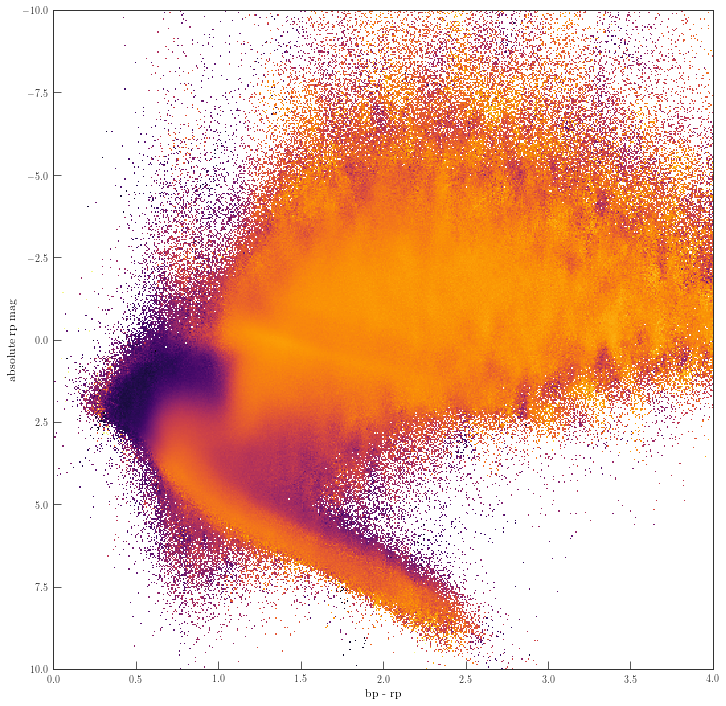

In [13]:
B = 500
common_kwds = dict(x=data["bp_rp"], y=absolute_rp_mag,
                   bins=(np.linspace(0, 4, B), np.linspace(-10, 10, B)),
                   subsample=None, function="mean", figsize=(10,10),
                   xlabel=r"\textrm{bp - rp}", ylabel=r"\textrm{absolute rp mag}")


# Plot \theta, the fraction of single stars
fig = plot_binned_statistic(z=rv_results[:, 0], 
                            vmin=0, vmax=1,
                            **common_kwds)

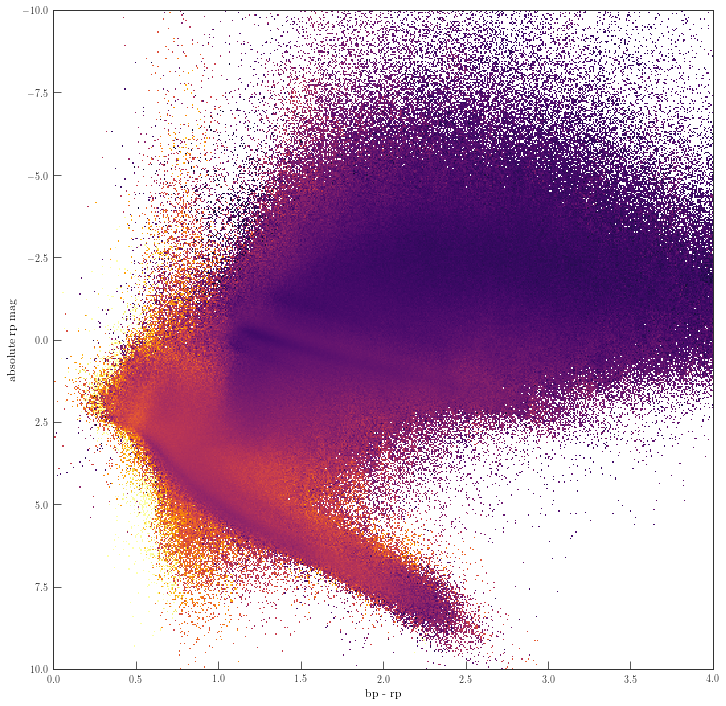

In [14]:
# plot \mu_{single}
fig = plot_binned_statistic(z=rv_results[:, 1], vmin=0, vmax=10, 
                            **common_kwds)

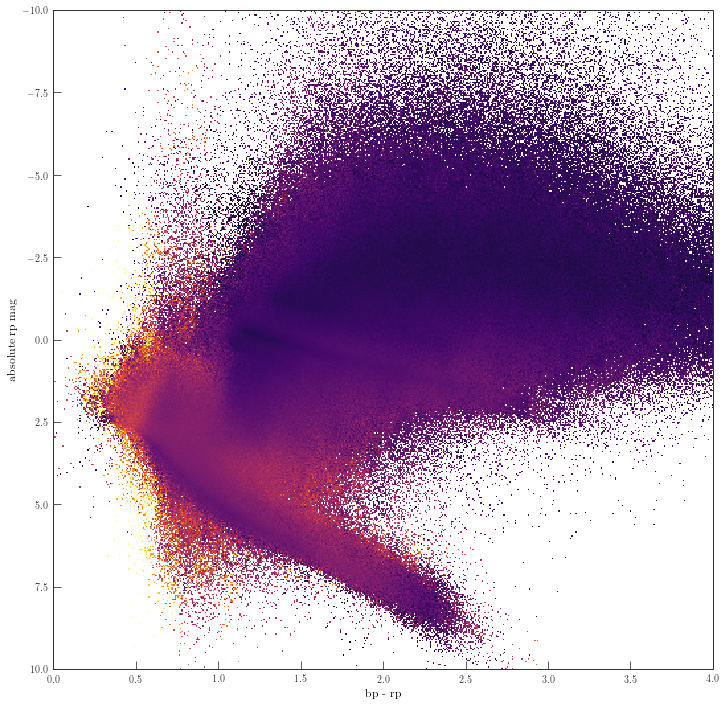

In [16]:
# plot \sigma_{single}
fig = plot_binned_statistic(z=rv_results[:, 2], vmin=0, vmax=5, **common_kwds)

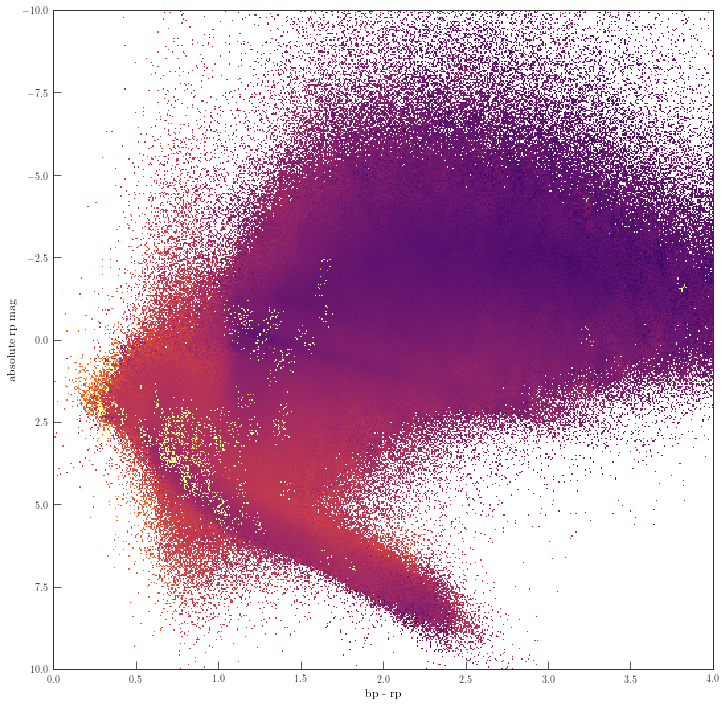

In [21]:
# plot \mu_{multiple}
fig = plot_binned_statistic(z=rv_results[:, 3], vmin=0, vmax=5, **common_kwds)

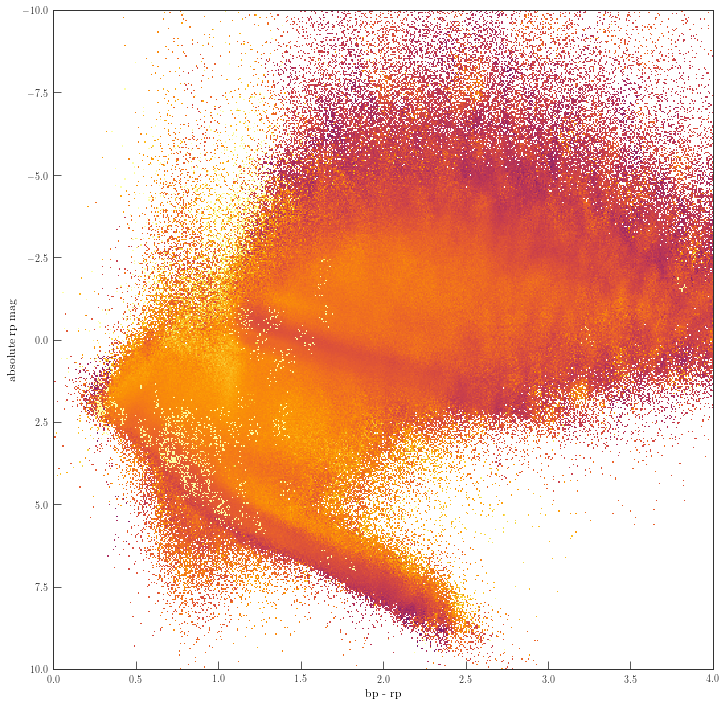

In [22]:
# plot \sigma_{multiple}
fig = plot_binned_statistic(z=rv_results[:, 4], vmin=0, vmax=1, **common_kwds)

In [23]:
# Check astrometric results
with open("../results/astrometric_unit_weight_error.pkl", "rb") as fp:
    astrometric_results = pickle.load(fp)

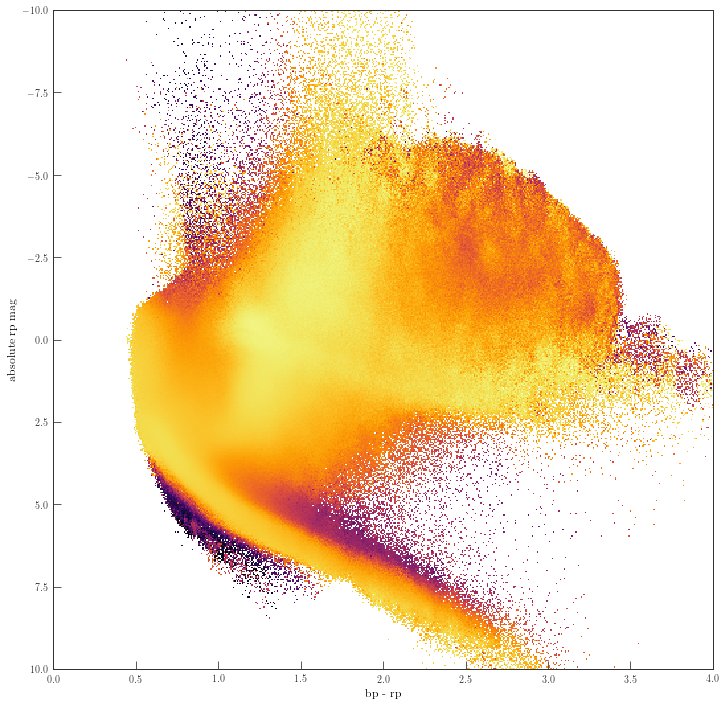

In [26]:
B = 500
common_kwds = dict(x=data["bp_rp"], y=absolute_rp_mag,
                   bins=(np.linspace(0, 4, B), np.linspace(-10, 10, B)),
                   subsample=None, function="mean", figsize=(10,10),
                   xlabel=r"\textrm{bp - rp}", ylabel=r"\textrm{absolute rp mag}")


# Plot \theta, the fraction of single stars
fig = plot_binned_statistic(z=astrometric_results[:, 0], 
                            vmin=0, vmax=1,
                            **common_kwds)

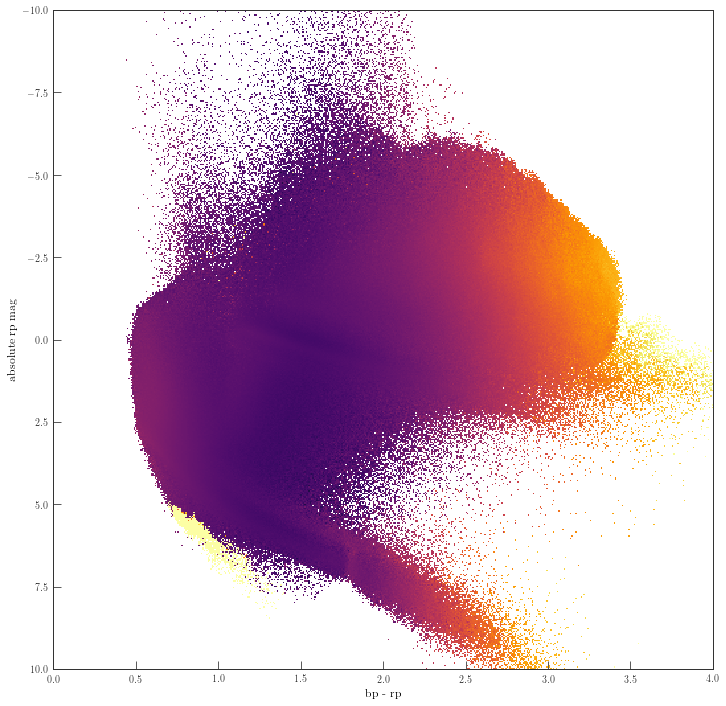

In [32]:
# Plot \mu_{single} for unit weight astrometric error
fig = plot_binned_statistic(z=astrometric_results[:, 1], 
                            vmin=0.5, vmax=3, **common_kwds)

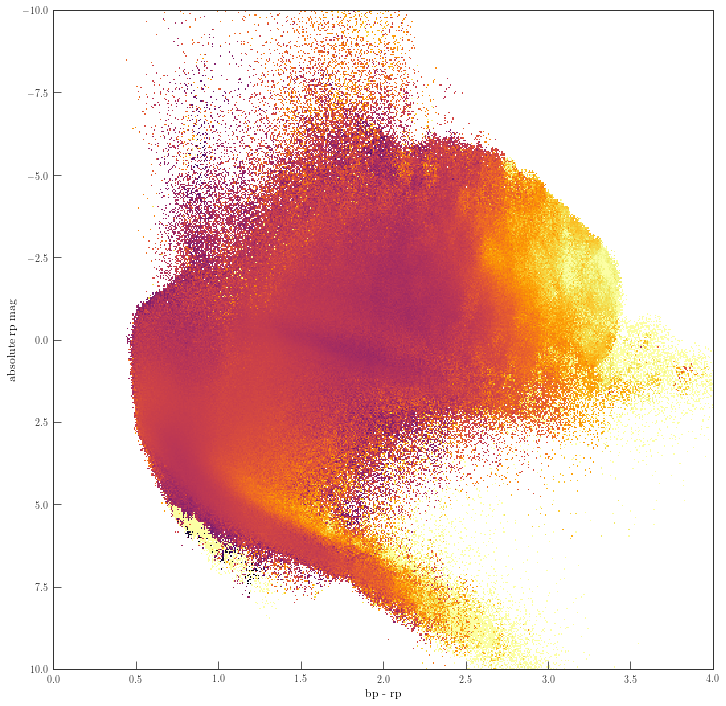

In [37]:
# Plot \sigma_{single} for unit weight astrometric error
fig = plot_binned_statistic(z=astrometric_results[:, 2], vmin=0, vmax=0.25,
                            **common_kwds)

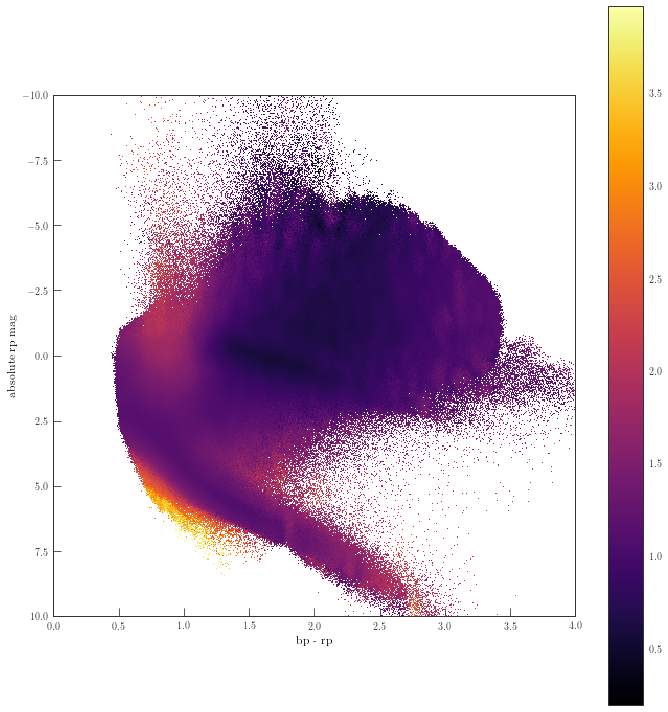

In [39]:
# Plot \mu_{multiple} for unit weight astrometric error
fig = plot_binned_statistic(z=astrometric_results[:, 3],
                            **common_kwds)

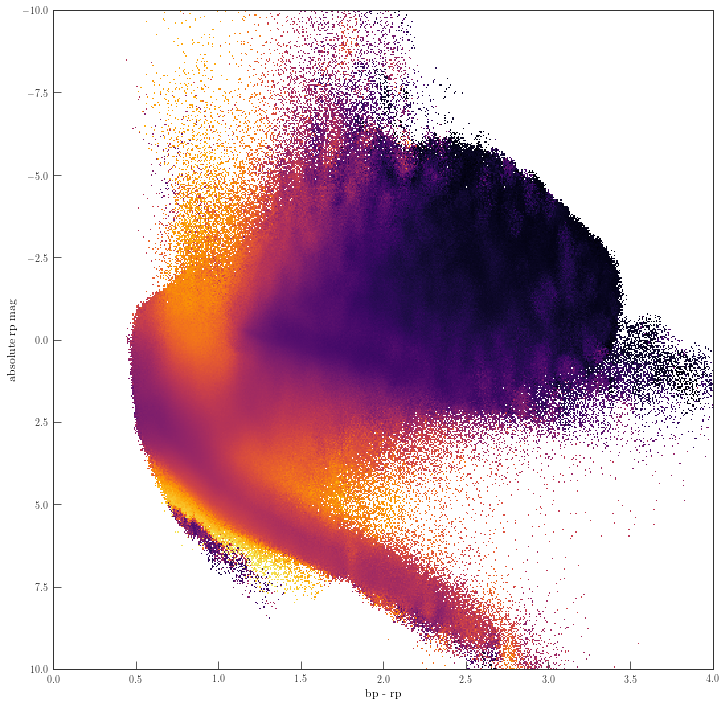

In [40]:
# Plot \sigma_{multiple} for unit weight astrometric error
fig = plot_binned_statistic(z=astrometric_results[:, 4],
                            **common_kwds)

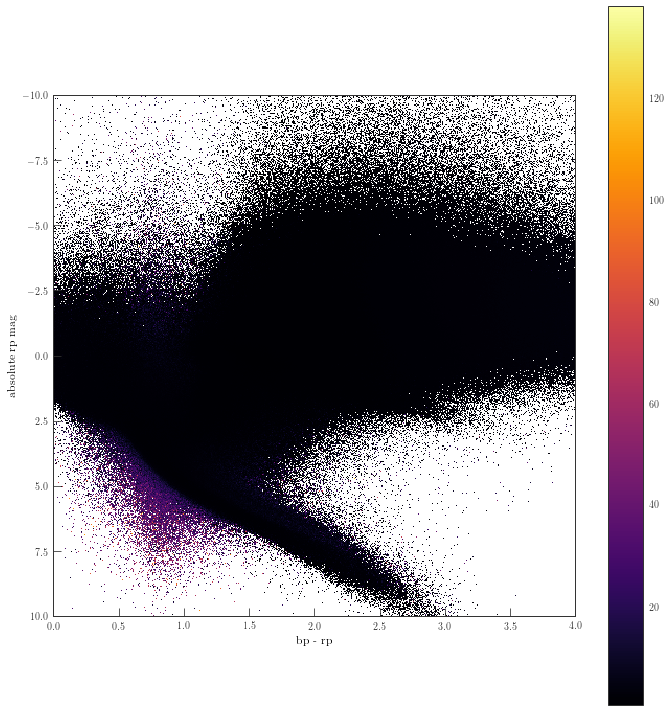

In [42]:
astrometric_unit_weight_error = np.sqrt(data["astrometric_chi2_al"]/(data["astrometric_n_obs_al"] - 5))

fig = plot_binned_statistic(z=astrometric_unit_weight_error, colorbar=True,
                            **common_kwds)

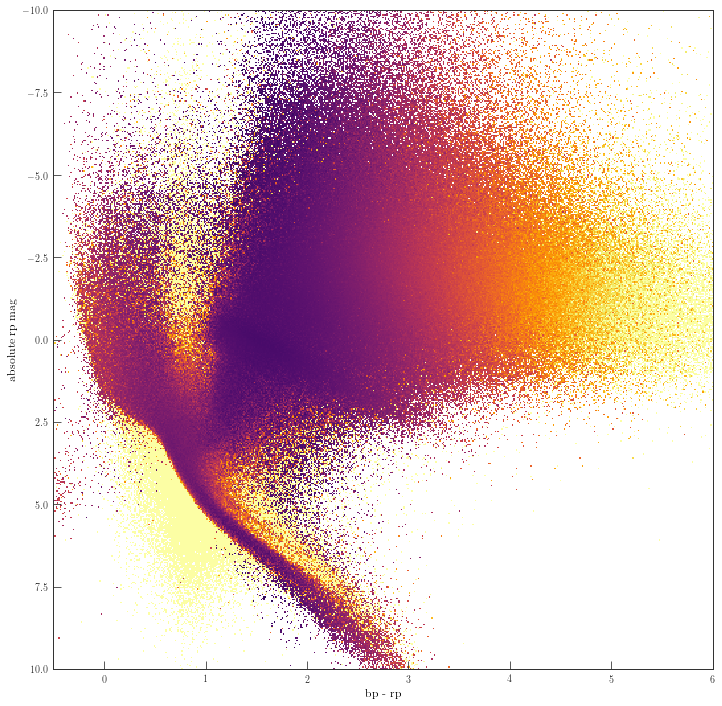

In [57]:
B = 500
common_kwds = dict(x=data["bp_rp"], y=absolute_rp_mag,
                   bins=(np.linspace(-0.5, 6, B), np.linspace(-10, 10, B)),
                   subsample=None, function="mean", figsize=(10,10),
                   xlabel=r"\textrm{bp - rp}", ylabel=r"\textrm{absolute rp mag}")


fig = plot_binned_statistic(z=astrometric_unit_weight_error, vmin=0, vmax=5,
                            **common_kwds)

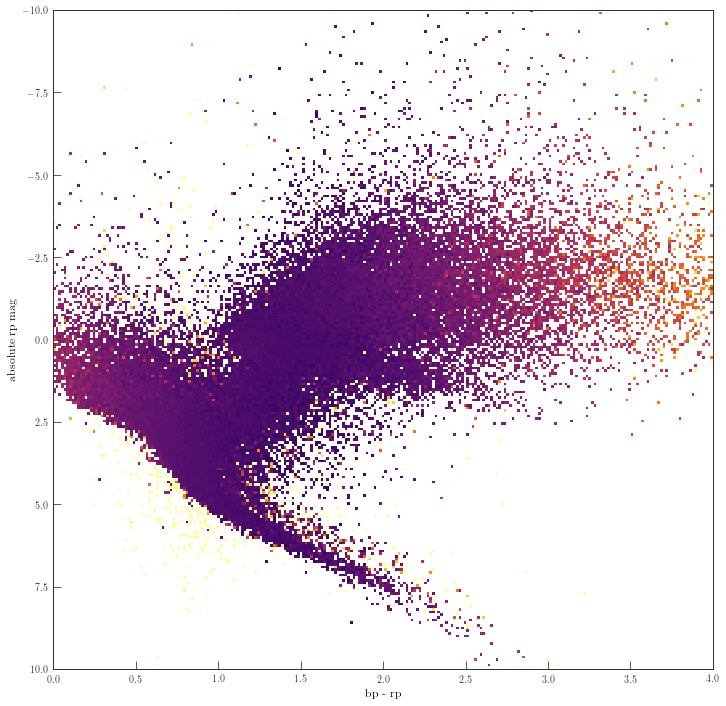

In [51]:
B = 250
common_kwds = dict(x=data["bp_rp"], y=absolute_rp_mag,
                   bins=(np.linspace(0, 4, B), np.linspace(-10, 10, B)),
                   subsample=0.01, function="median", figsize=(10,10),
                   xlabel=r"\textrm{bp - rp}", ylabel=r"\textrm{absolute rp mag}")


fig = plot_binned_statistic(z=astrometric_unit_weight_error, vmin=0, vmax=5,
                            **common_kwds)

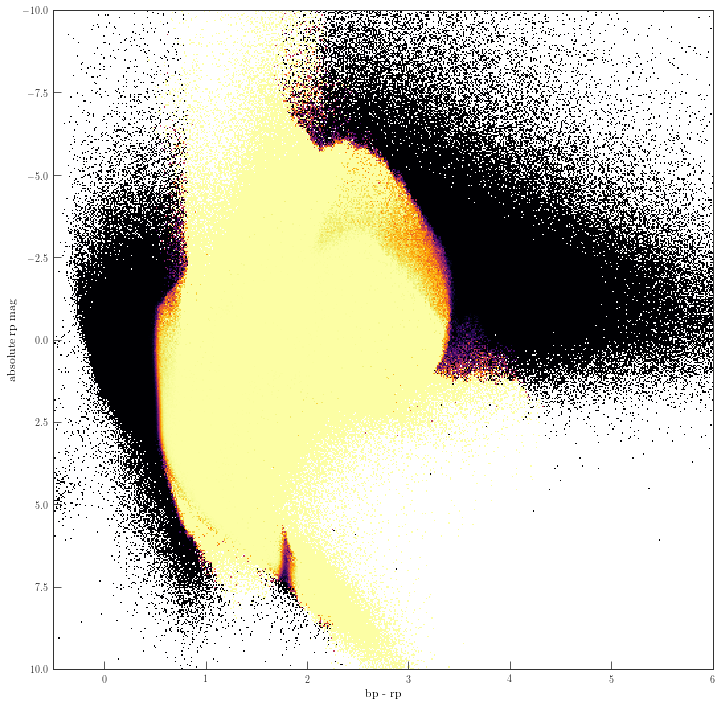

In [58]:
B = 500
common_kwds = dict(x=data["bp_rp"], y=absolute_rp_mag,
                   bins=(np.linspace(-0.5, 6, B), np.linspace(-10, 10, B)),
                   subsample=None, function="mean", figsize=(10,10),
                   xlabel=r"\textrm{bp - rp}", ylabel=r"\textrm{absolute rp mag}")


fig = plot_binned_statistic(z=np.isfinite(astrometric_results[:, 0]).astype(int), 
                            vmin=0, vmax=1,
                            **common_kwds)